1. $x^{(k+1)}=x^{(k)}-\eta \bullet {}_0^R \mathscr{D}_x^\alpha f(x^{(k)})$

2. $f(x) = {x^2} + 5x + 6$

3. ${}_0^R \mathscr{D}_x^\alpha f(x)=sign(x)\frac{{2}}{{\Gamma (3 - \alpha )}}{|x|^{2 - \alpha }} + \frac{5}{{\Gamma (2 - \alpha )}}{(|x|+\epsilon)^{1 - \alpha }} + sign(x) \frac{6}{{\Gamma \left( {1 - \alpha } \right)}}{(|x|+\epsilon)^{ - \alpha }}$

4. ${}_0^R \mathscr{D}_x^\alpha f(x)=sign(x)\frac{{2}}{{\Gamma (3 - \alpha )}}{|x|^{2 - \alpha }} + \frac{5}{{\Gamma (2 - \alpha )}}{(|x|+\epsilon)^{1 - \alpha }} + clip(sign(x) \frac{6}{{\Gamma \left( {1 - \alpha } \right)}}{(|x|+\epsilon)^{ - \alpha }};-c,c)$

In [87]:
import numpy as np
from scipy.special import gamma

#Equation 3
def expression1_differentiation(x, alpha=0.9, epsilon=1e-8):
    sign_x = np.sign(x)
    abs_x = np.abs(x)
    
    term1 = sign_x * (2/gamma(3 - alpha)) * (abs_x **(2-alpha))
    term2 = (5/gamma(2 - alpha)) * ((abs_x + epsilon)  **(1 - alpha))
    term3 = sign_x * (6/gamma(1 - alpha)) * ((abs_x + epsilon)**(-alpha))
    
    return term1 + term2 + term3

#Equation 4
def expression1_differentiation_L2(x, alpha=0.9, epsilon=1e-8, c=1.0):
    sign_x = np.sign(x)
    abs_x = np.abs(x)
    
    term1 = sign_x * (2/gamma(3 - alpha)) * (abs_x **(2-alpha))
    term2 = (5/gamma(2 - alpha)) * ((abs_x + epsilon)  **(1 - alpha))
    term3_L2 = np.clip(sign_x * (6/gamma(1 - alpha)) * ((abs_x + epsilon)**(-alpha)),a_min=-c,a_max=c)
    
    return term1 + term2 + term3_L2

#Equation 2
def expression1_function(x):
    return x**2 + 5*x + 6

#FGD
def FGD(x0 = 10, lr = 0.3, alpha=0.9, max_iter=10, epsilon=1e-8):
    dif = [x0]
    dif_x = []
    x = x0
    for i in range(max_iter):
        gradient = expression1_differentiation(x, alpha, epsilon)
        x -= lr * gradient
        dif.append(x)
        dif_x.append(lr * gradient)
    return dif, dif_x

#FGD_L2
def FGD_L2(x0 = 10, lr = 0.3, alpha=0.9, max_iter=10, epsilon=1e-8,c=1.0):
    dif = [x0]
    dif_x = []
    x = x0
    for i in range(max_iter):
        gradient = expression1_differentiation_L2(x, alpha, epsilon, c)
        x -= lr * gradient
        dif.append(x)
        dif_x.append(lr * gradient)
    return dif, dif_x

In [89]:
import matplotlib.pyplot as plt
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath, amssymb}'
custom_params = {
    'font.size': 20,
    'lines.linewidth': 1,
    'axes.labelsize': 20,
    'axes.titlesize': 20,
    'xtick.labelsize': 20,
    'ytick.labelsize': 20,
    'legend.fontsize': 20,
    'grid.linestyle': '--',
    'grid.alpha': 0.8,
}

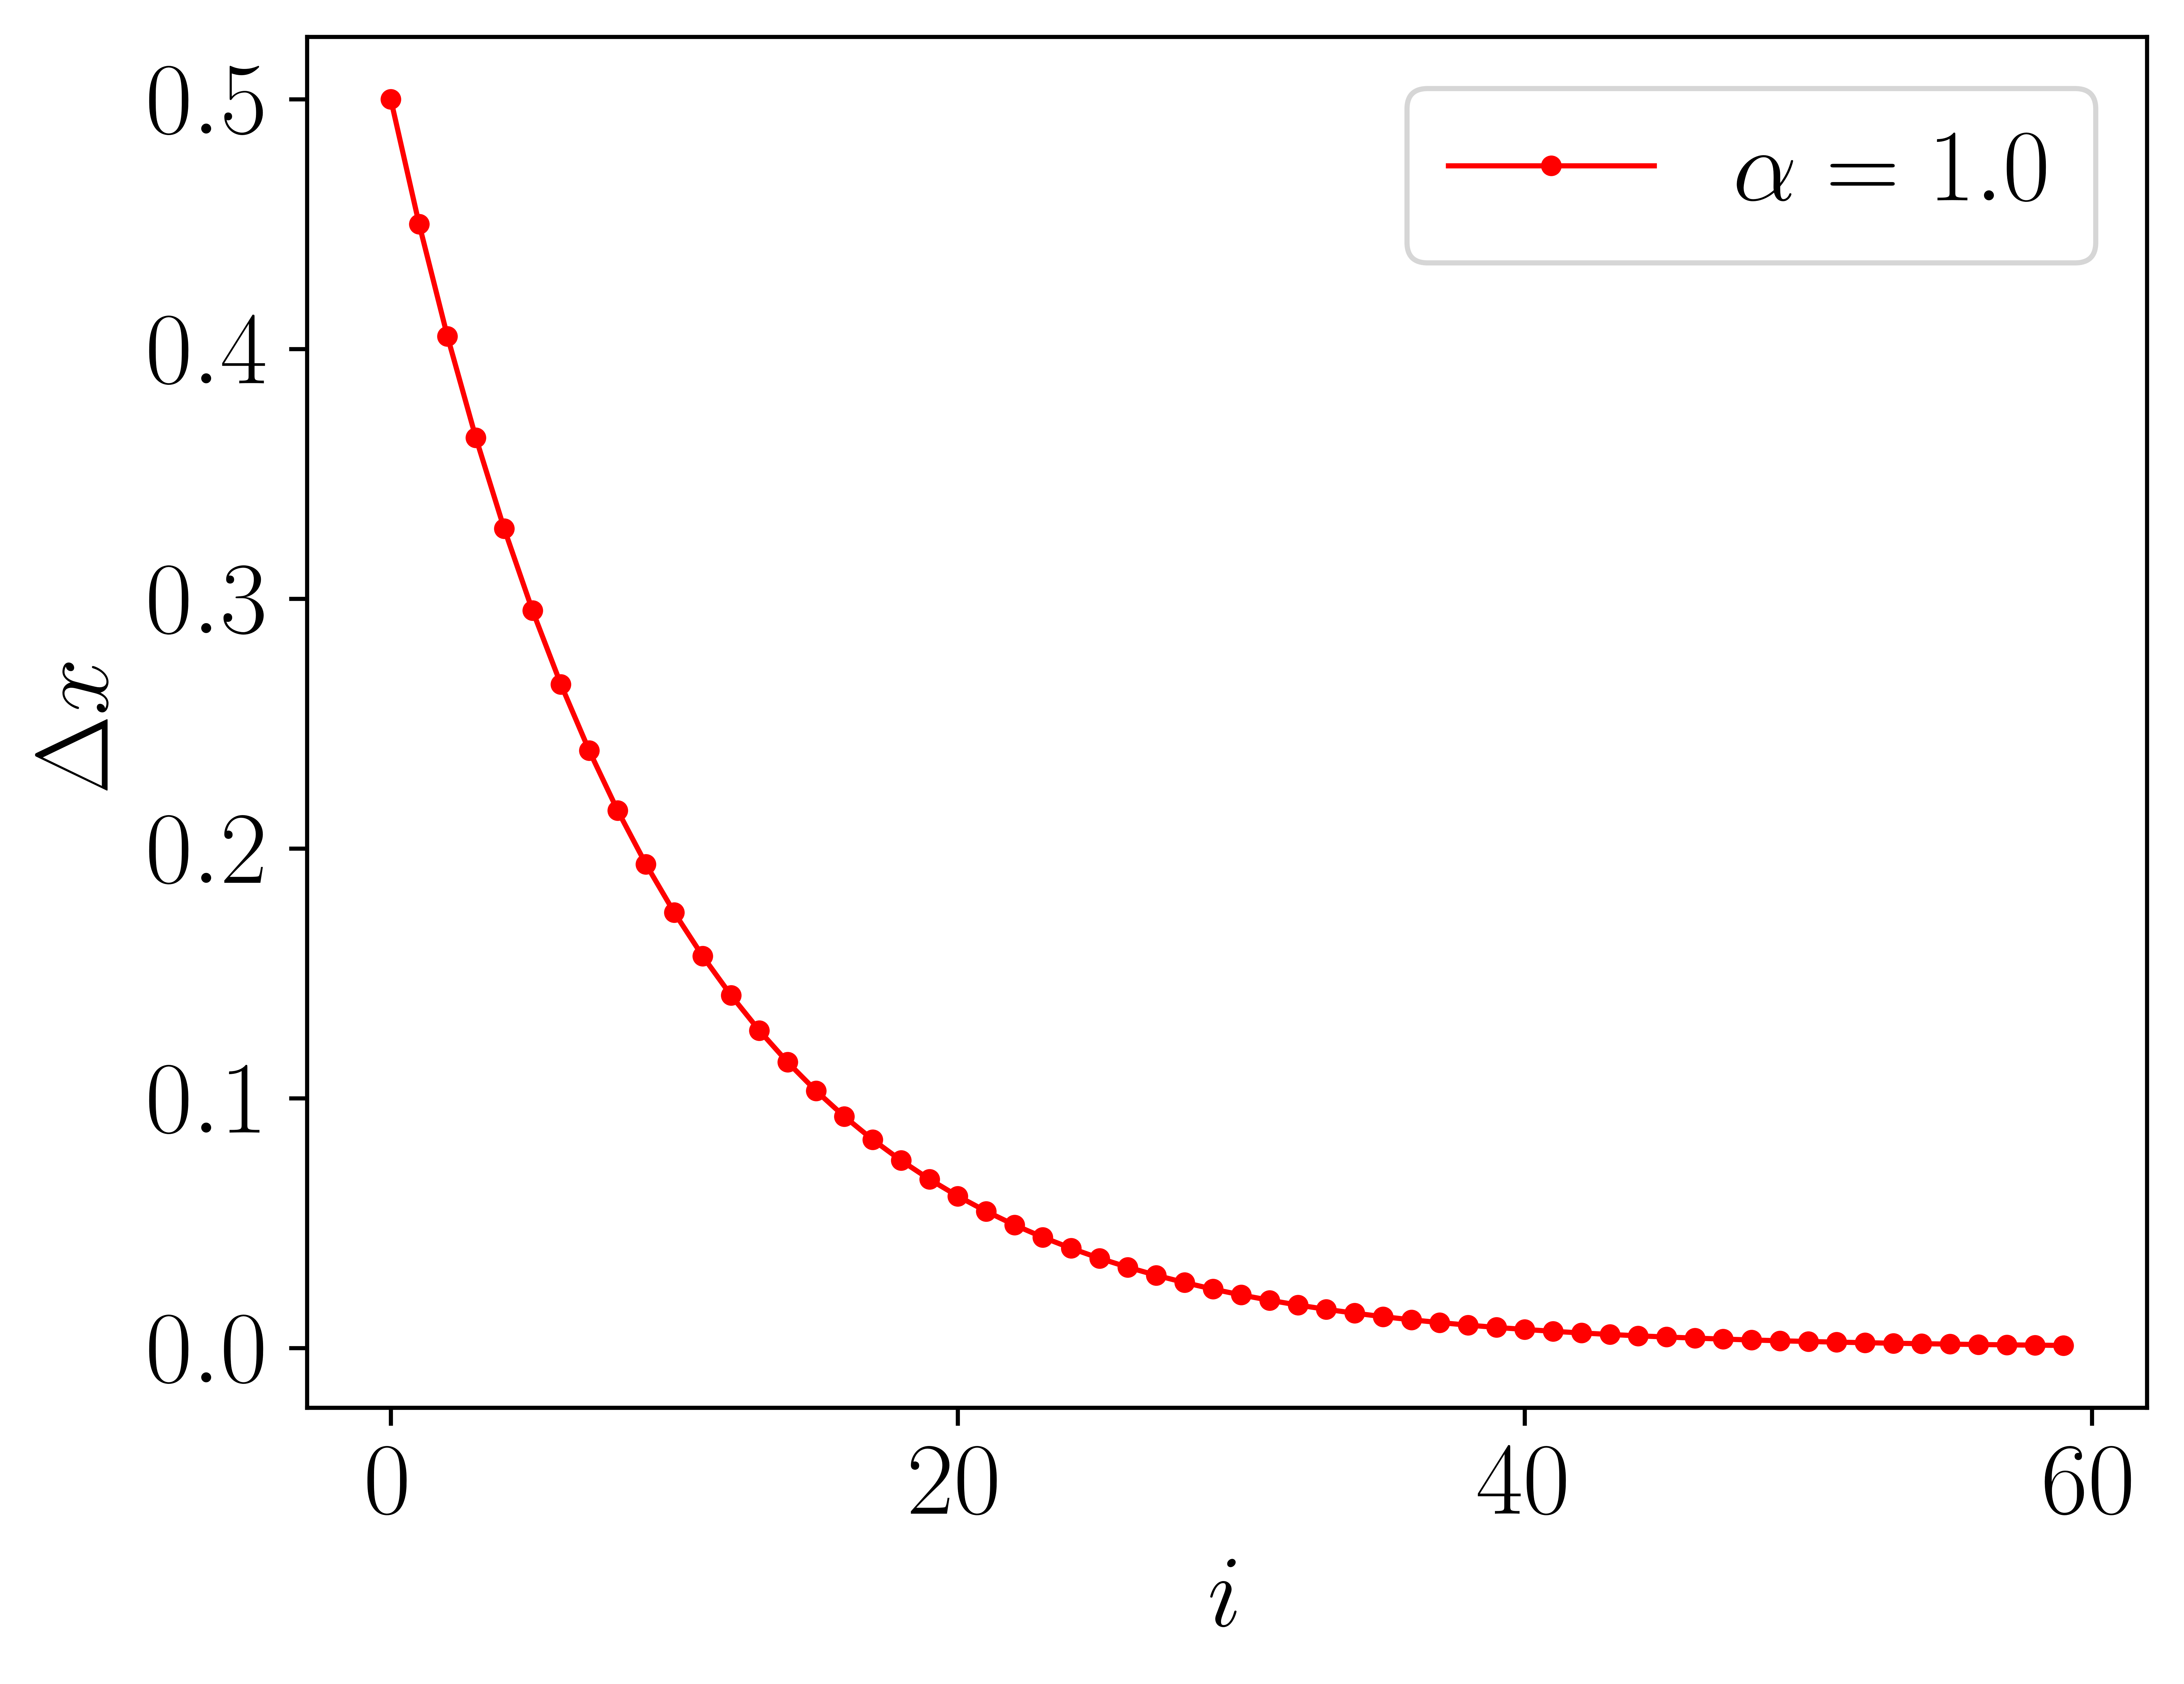

In [120]:
#FGD and FGD-L2 in different hyper-parameter
import matplotlib.pyplot as plt
import torch as t

fig = plt.figure(dpi=1200)     
plt.rcParams.update(custom_params)

lr = 5e-2
max_iter = 60
epsilon = 1e-8
x0 = 2.5    
alpha = 0.9   #0.1,0.3,0.5,0.7,0.9,1.0
#k is the exponential decay coefficient.
c = 0.1  

x1,dif_x1 = FGD(x0,lr,alpha,max_iter,epsilon)
# print(x1)
y1 = expression1_function(t.tensor(x1))

x1_L2,dif_x1_L2 = FGD_L2(x0,lr,alpha,max_iter,epsilon,c)
# print(x1_L2)
y1_L2 = expression1_function(t.tensor(x1_L2))

# plt.ticklabel_format(axis='both', style='sci', scilimits=(0, 5))
plt.ticklabel_format(axis='both', style='sci')
plt.xlabel(r'$i$')
plt.ylabel(r'$\Delta x$')
plt.plot(dif_x1,color='blue',marker='o',markersize=3,label=r'FGD')
plt.plot(dif_x1_L2,color='red',marker='o',markersize=3,label=r'FGD-L2')
# plt.plot(dif_x1_L2,color='red',marker='o',markersize=3,label=r'$\alpha=1.0$')
# plt.axhline(0,color='gray',linestyle='--',linewidth=1)
plt.legend()
# plt.grid()
plt.savefig('picture/fig1/Fig1'+'_'+str(x0)+'_'+str(alpha)+'_'+str(c)+'.svg',bbox_inches='tight',format='svg')
plt.savefig('picture/fig1/Fig1'+'_'+str(x0)+'_'+str(alpha)+'_'+str(c)+'.pdf',bbox_inches='tight',format='pdf')
plt.show()